# Importing Packages / Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving sentiment_train (1).csv to sentiment_train (1).csv


In [3]:
# Reading Dataset
dataset = pd.read_csv("sentiment_train (1).csv")

In [4]:
# Printing first five records
dataset.head()

,Sentence,Polarity
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
# Checking for one sentence
dataset['Sentence'].values[1]

'Crust is not good.'

In [6]:
# Looking for the number of rows and columns in the dataset
dataset.shape

(2400, 2)

In [7]:
# Looking at number of positive: 1 and negative: 0 reviews
dataset['Polarity'].value_counts()

0    1213
1    1187
Name: Polarity, dtype: int64

[]

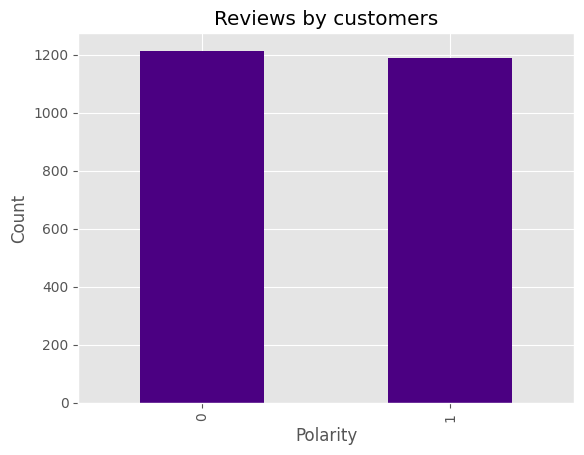

In [9]:
#plotting bar graph
plt=dataset['Polarity'].value_counts().sort_index().plot(kind='bar',
                                                title="Reviews by customers",
                                                color="indigo" )
#Adding X and Y labels
plt.set_xlabel("Polarity")
plt.set_ylabel("Count")
plt.plot()

In [10]:
# Checking for any NULL values
dataset.isnull().sum()

Sentence    0
Polarity    0
dtype: int64

In [11]:
# Looking at the structure of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2400 non-null   object
 1   Polarity  2400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB


In [14]:
# Importing Natural language Toolkit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Data Preprocessing

In [17]:
sentence= dataset['Sentence'][1]
print(sentence)
# Tokenizing sentences and breaking down into words
tokens=nltk.word_tokenize(sentence)

#To view tokens
tokens

Crust is not good.


['Crust', 'is', 'not', 'good', '.']

In [18]:
#Printing Frequency Distribution
from nltk.probability import FreqDist
freq_dist = FreqDist(tokens)
print(freq_dist)
freq_dist.most_common(5)

<FreqDist with 5 samples and 5 outcomes>


[('Crust', 1), ('is', 1), ('not', 1), ('good', 1), ('.', 1)]

In [19]:
# Using stopwords to remove unecessary words
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words=set(stopwords.words("english"))
print(stop_words)
tokens = [word for word in tokens if word.lower() not in stop_words]

{'yours', "wasn't", 'have', 'which', 'more', 'will', 'aren', 've', 'doesn', 'his', 'those', 'm', 'until', "weren't", 'or', 'few', 'hasn', 'each', 'too', "mustn't", 'wouldn', 'why', 'yourself', "you'll", "couldn't", 'hadn', 'isn', 'after', 'doing', 'herself', 'on', "isn't", "won't", 'they', 'how', 'during', "it's", 'against', 'the', 'down', 're', 'themselves', 'at', 'd', 'were', 'him', 'theirs', "you're", 'if', 'is', 'again', 'should', 'off', "needn't", 'as', 'couldn', 'where', 'because', 'a', 'shouldn', "wouldn't", 'whom', 'while', 'weren', 'up', 'll', 'its', 'about', 'nor', "you'd", 'through', 'i', 'ain', 'o', 'you', 'your', 'am', 'only', 'being', 'between', 'don', 'it', 'into', 'ours', "haven't", 'both', 'had', 'hers', 'other', 'myself', 'than', 'having', 'are', "hadn't", 'her', 'she', 'with', 'did', 'can', 'itself', 'just', 'when', 'very', "you've", 'from', 'not', 'no', 't', 'that', 'over', 'such', 'yourselves', 'their', 'some', 'once', 'has', 'didn', 'for', 'any', 'and', 'himself',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
# Using Sentiment Intensity Analyzer
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
SIA=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# **VADER SENTIMENT ANALYSIS**

In [21]:
import pandas as pd
from tqdm import tqdm
from nltk.sentiment import SentimentIntensityAnalyzer

# Assuming you have initialized the SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

# Assuming 'dataset' is your DataFrame with columns 'Sentence' and 'Polarity'
results = []

for index, row in tqdm(dataset.iterrows(), total=len(dataset)):
    text = row['Sentence']
    polarity_scores = SIA.polarity_scores(text)
    results.append({'Sentence': text, 'Polarityy': polarity_scores['compound']})

# Create a new DataFrame with sentiment scores
vader_results = pd.DataFrame(results)

# Concatenate the original DataFrame with the new sentiment scores DataFrame
dataset_with_sentiment = pd.concat([dataset, vader_results['Polarityy']], axis=1)


100%|██████████| 2400/2400 [00:01<00:00, 2067.81it/s]


In [22]:
# Dataset with polarity analyzed by VADER
dataset_with_sentiment

,Sentence,Polarity,Polarityy
0,Wow... Loved this place.,1,0.5994
1,Crust is not good.,0,-0.3412
2,Not tasty and the texture was just nasty.,0,-0.5574
3,Stopped by during the late May bank holiday of...,1,0.6908
4,The selection on the menu was great and so wer...,1,0.6249
...,...,...,...
2395,Almost all of the songs in Cover Girl are old-...,0,0.0000
2396,The most annoying thing about 'Cover Girl' is ...,0,-0.4576
2397,"Unfortunately, 'Cover Girl' is an example of h...",0,0.1531
2398,Non-linear narration thus many flashbacks and ...,1,0.3384


In [28]:
# Created a function to classify polarity values<0.5  as a negative statement and values>0 as a positive statement
def convert_polarity_to_binary(polarity_value):
    return 1 if polarity_value > 0.5 else 0

# Apply the function to create a new column 'Binary_Polarity'
dataset_with_sentiment['Binary_Polarity'] = dataset_with_sentiment['Polarityy'].apply(convert_polarity_to_binary)

# Display the updated DataFrame
dataset_with_sentiment

,Sentence,Polarity,Polarityy,Binary_Polarity
0,Wow... Loved this place.,1,0.5994,1
1,Crust is not good.,0,-0.3412,0
2,Not tasty and the texture was just nasty.,0,-0.5574,0
3,Stopped by during the late May bank holiday of...,1,0.6908,1
4,The selection on the menu was great and so wer...,1,0.6249,1
...,...,...,...,...
2395,Almost all of the songs in Cover Girl are old-...,0,0.0000,0
2396,The most annoying thing about 'Cover Girl' is ...,0,-0.4576,0
2397,"Unfortunately, 'Cover Girl' is an example of h...",0,0.1531,0
2398,Non-linear narration thus many flashbacks and ...,1,0.3384,0


In [29]:
!pip install scikit-plot

In [30]:
# Checking accuracy using Confusion Matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

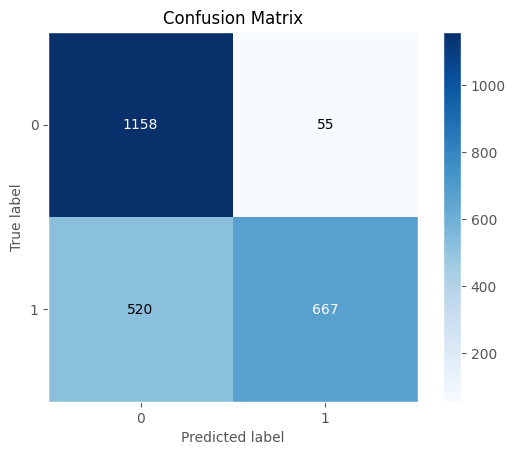

In [31]:
plot_confusion_matrix(dataset_with_sentiment['Polarity'],dataset_with_sentiment['Binary_Polarity'])

In [32]:
# Calculating Accuracy , Precision and Recall Score
acc_score = accuracy_score(dataset_with_sentiment['Polarity'],dataset_with_sentiment['Binary_Polarity'])
pre_score = precision_score(dataset_with_sentiment['Polarity'],dataset_with_sentiment['Binary_Polarity'])
rec_score = recall_score(dataset_with_sentiment['Polarity'],dataset_with_sentiment['Binary_Polarity'])
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)

Accuracy_score:  0.7604166666666666
Precision_score:  0.9238227146814404
Recall_score:  0.5619208087615838


# **LSTM MODEL**

# Data Pre-processing

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
import re # Regular expressions for text manipulation
from nltk.tokenize import word_tokenize # it is for Tokenization (breaking text into words)
from nltk.corpus import stopwords # words that are not contributing
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
from nltk.tokenize import word_tokenize

In [42]:
reviews_df= pd.read_csv("sentiment_train (1).csv")

In [43]:
# Custom stop words
custom_stopwords = set(['not', 'never'])

# text preprocessing with custom stopwords
def processed_text1(text):

  # Convert to lowercase
  text = text.lower()

# Remove special characters and numbers using regular expressions
  text = re.sub(r'[^a-zA-Z\s]', '', text)

# Tokenization
  tokens = word_tokenize(text)

# Remove stop words --- including custom stop words
  stop_words = set(stopwords.words('english')) - custom_stopwords
  tokens = [word for word in tokens if word not in stop_words]

# Join the tokens to form .0a string
  processed_text1 = ' '.join(tokens)
  return processed_text1

# Apply text preprocessing to the 'Sentence' column in the DataFrame
reviews_df['cleaned_text'] = reviews_df['Sentence'].apply(lambda x: processed_text1(x))

#DataFrame with the cleaned_text column
print(reviews_df[['Polarity', 'cleaned_text']])

      Polarity                                       cleaned_text
0            1                                    wow loved place
1            0                                     crust not good
2            0                            not tasty texture nasty
3            1  stopped late may bank holiday rick steve recom...
4            1                        selection menu great prices
...        ...                                                ...
2395         0   almost songs cover girl oldfashioned not tuneful
2396         0  annoying thing cover girl way rita hayworth pu...
2397         0  unfortunately cover girl example hollywood use...
2398         1  nonlinear narration thus many flashbacks every...
2399         1  good cinematography also makes monica bellucci...

[2400 rows x 2 columns]


In [44]:
#preprocesssing for stopwords,lowercasing , removing special symbols , tokenization
reviews_df

,Sentence,Polarity,cleaned_text
0,Wow... Loved this place.,1,wow loved place
1,Crust is not good.,0,crust not good
2,Not tasty and the texture was just nasty.,0,not tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,selection menu great prices
...,...,...,...
2395,Almost all of the songs in Cover Girl are old-...,0,almost songs cover girl oldfashioned not tuneful
2396,The most annoying thing about 'Cover Girl' is ...,0,annoying thing cover girl way rita hayworth pu...
2397,"Unfortunately, 'Cover Girl' is an example of h...",0,unfortunately cover girl example hollywood use...
2398,Non-linear narration thus many flashbacks and ...,1,nonlinear narration thus many flashbacks every...


In [46]:
X = reviews_df['cleaned_text']
y = reviews_df['Polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
"""LSTM is long short term memory it is a type of recurrent neural network (RNN) , it is commonly used in natural language processing and
sentiment analysis + improvidsed version hain RNN ka , excellent memory cell + it remembers info + more traianing stability + can handle large
dataset effectively"""

'LSTM is long short term memory it is a type of recurrent neural network (RNN) , it is commonly used in natural language processing and\nsentiment analysis + improvidsed version hain RNN ka , excellent memory cell + it remembers info + more traianing stability + can handle large\ndataset effectively'

# STEP - 3 FEATURE EXTRACTION
Feature extraction(converting raw text into set of features that can be used as an input in ML model)

it provides a feature representation of free-form text that can be used by machine learning algorithms for processing language

we have 3 choices : 1 = bag of words (count + check absence or presence of words) 2 = term frequency - inverse document frequency(count for
words) 3 - word embedding (pretty tough lol...)
we are using Bag of words for feature extraction ( it converts text into feature vector to be used in our model)

In [47]:
#CountVectorizer instance
vectorizer = CountVectorizer()
# Fit and transform the training data
X_train_B = vectorizer.fit_transform(X_train)
# Transform the test data using the same vectorizer
X_test_B = vectorizer.transform(X_test)


# STEP-4 MODEL SELECTION AND TRAINING

In [49]:
"""here we have 2 choices first is to use RNN its is NLP model for short words or sentences and 2nd is LSTM long term dependencies like long
sentences
Truncate (cutting words) and Padding(adding words):"""

'here we have 2 choices first is to use RNN its is NLP model for short words or sentences and 2nd is LSTM long term dependencies like long\nsentences\nTruncate (cutting words) and Padding(adding words):'

In [48]:
max_words = 10000
max_len = 110
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

In [50]:
"""Theory:
max_ words = only top 10000 words will be considered
max_len = max length of each sequence if less pad if more truncate
tokenizer = keras library tool , used for converting text data into integer sequence
text_to_sequence =text to int sequence
pad_sequence = make sure all sequenec have same length if nedded truncate or padding"""

'Theory:\nmax_ words = only top 10000 words will be considered\nmax_len = max length of each sequence if less pad if more truncate\ntokenizer = keras library tool , used for converting text data into integer sequence\ntext_to_sequence =text to int sequence\npad_sequence = make sure all sequenec have same length if nedded truncate or padding'

In [51]:
"""HYPER PARAMETER TUNING (Regularization,epoch,dropout,early stopping,optimizers)
LSTM model as more training stability + can handle large dataset + memory cell + remember previous info
"""

'HYPER PARAMETER TUNING (Regularization,epoch,dropout,early stopping,optimizers)\nLSTM model as more training stability + can handle large dataset + memory cell + remember previous info\n'

In [52]:
embedding_dim = 50
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(units=100))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))

In [54]:
"""THOERY:
embedding_dim = dimensionality of the dense embedding for each word. It's a hyperparameter
[model = Sequential()] = let you run model step by step , or layer by layer like stacking
THEORY:
Embedding is the first layer added to the model. It turns positive integers
(word indices) into dense vectors of fixed size. The parameters are:
input_dim: The size of the vocabulary, i.e., the maximum integer index + 1.
output_dim: The dimension of the dense embedding.
input_length: The length of input sequences (in this case, max_len), which should be consistent with the length
of the sequences after padding.
Dropout- randomly drops (0.3) fraction of data to avoid overfitting
Theory:
it defines a simple neural network architecture for sentiment analysis.
The Embedding layer converts words into dense vectors, the LSTM layer
captures sequence patterns, Dropout helps prevent overfitting, and the
Dense layer produces the final output for binary classification.
Adjusting hyperparameters,
such as embedding_dim and the number of LSTM units, allows you to fine-tune the model for better performance """

"THOERY:\nembedding_dim = dimensionality of the dense embedding for each word. It's a hyperparameter\n[model = Sequential()] = let you run model step by step , or layer by layer like stacking\nTHEORY:\nEmbedding is the first layer added to the model. It turns positive integers\n(word indices) into dense vectors of fixed size. The parameters are:\ninput_dim: The size of the vocabulary, i.e., the maximum integer index + 1.\noutput_dim: The dimension of the dense embedding.\ninput_length: The length of input sequences (in this case, max_len), which should be consistent with the length\nof the sequences after padding.\nDropout- randomly drops (0.3) fraction of data to avoid overfitting\nTheory:\nit defines a simple neural network architecture for sentiment analysis.\nThe Embedding layer converts words into dense vectors, the LSTM layer\ncaptures sequence patterns, Dropout helps prevent overfitting, and the\nDense layer produces the final output for binary classification.\nAdjusting hyperpa

In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [56]:
epochs = 6
batch_size = 80
model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)


Epoch 1/6
22/22 [==============================] - 17s 411ms/step - loss: 0.6899 - accuracy: 0.5434 - val_loss: 0.6844 - val_accuracy: 0.6771
Epoch 2/6
22/22 [==============================] - 8s 353ms/step - loss: 0.6480 - accuracy: 0.7257 - val_loss: 0.6378 - val_accuracy: 0.7083
Epoch 3/6
22/22 [==============================] - 6s 248ms/step - loss: 0.4702 - accuracy: 0.8698 - val_loss: 0.5704 - val_accuracy: 0.7396
Epoch 4/6
22/22 [==============================] - 6s 271ms/step - loss: 1.3997 - accuracy: 0.7795 - val_loss: 0.4917 - val_accuracy: 0.8125
Epoch 5/6
22/22 [==============================] - 10s 466ms/step - loss: 0.2246 - accuracy: 0.9543 - val_loss: 0.4608 - val_accuracy: 0.8177
Epoch 6/6
22/22 [==============================] - 7s 319ms/step - loss: 0.1465 - accuracy: 0.9763 - val_loss: 0.4655 - val_accuracy: 0.8125


In [163]:
y_pred_prob = model.predict(X_test_padded)
y_pred = (y_pred_prob > 0.5).astype('int32')
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')



Epoch 1/6
60/60 [==============================] - 1s 2ms/step - loss: 34.8699 - accuracy: 0.5000
Epoch 2/6
60/60 [==============================] - 0s 2ms/step - loss: 12.9760 - accuracy: 0.5156
Epoch 3/6
60/60 [==============================] - 0s 2ms/step - loss: 9.6193 - accuracy: 0.5250
Epoch 4/6
60/60 [==============================] - 0s 2ms/step - loss: 8.0218 - accuracy: 0.5240
Epoch 5/6
60/60 [==============================] - 0s 2ms/step - loss: 6.7160 - accuracy: 0.5427
Epoch 6/6
60/60 [==============================] - 0s 2ms/step - loss: 6.2869 - accuracy: 0.5417
